In [209]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def set_to_df_with_filter(df):
  df = pd.DataFrame({'timestamp': pd.to_datetime(df['date'], errors='coerce'), 'total_cases': df.total_cases})
  df['timestamp'] = df['timestamp'].apply(lambda x: "%d-%d" % (x.month, x.year))  
  df = df.loc[df["timestamp"].shift() != df["timestamp"]]
  df.groupby(['timestamp', 'total_cases']).size()

  timestamp = df['timestamp']
  total_cases = df['total_cases']

  return np.array(timestamp), np.array(total_cases)

# Import data and preparation
df = pd.read_csv("files/Case_PRB.csv", header = 0)
df = df.fillna(0)

# Retrieve the dataframe for the United States
df_netherlands = df[(df['location'] == "Netherlands")]
df_france = df[(df['location'] == "France")]
df_usa = df[(df['location'] == "United States")]
df_china = df[(df['location'] == "China")]

dutch_X, dutch_y = set_to_df_with_filter(df_netherlands)
france_X, france_y = set_to_df_with_filter(df_france)
usa_X, usa_y = set_to_df_with_filter(df_usa)
china_X, china_y = set_to_df_with_filter(df_china)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


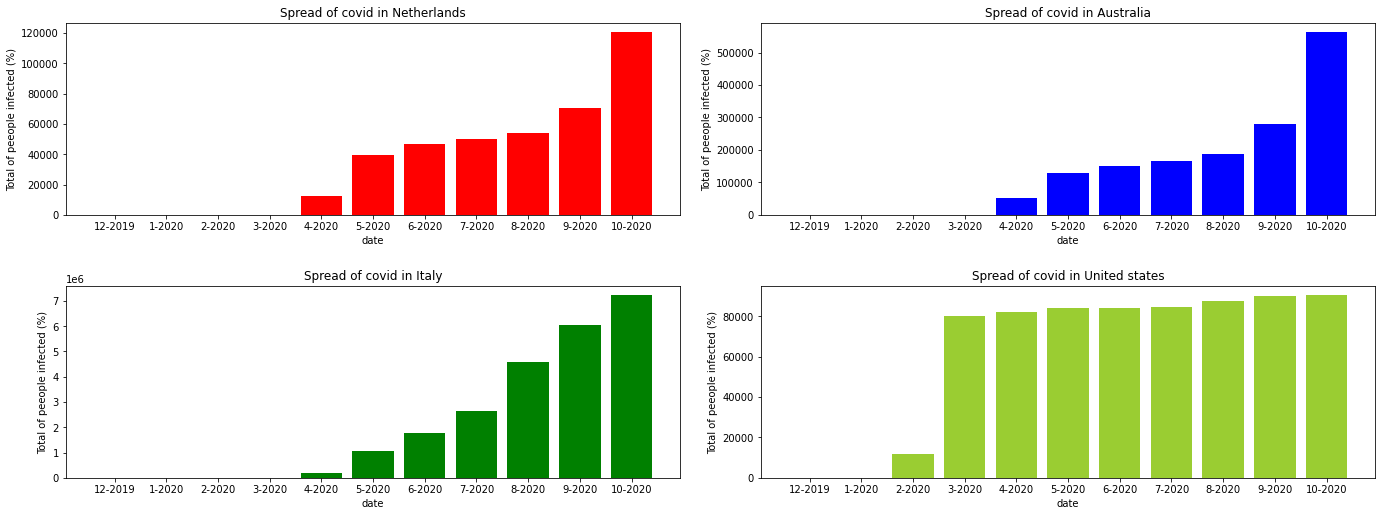

In [210]:
# Plot infomration
fig, ax = plt.subplots(2, 2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax[0, 0].bar(dutch_X, dutch_y, label="Netherlands", color='red')
ax[0, 0].set_title("Spread of covid in Netherlands")
ax[0, 0].set_xlabel("date")
ax[0, 0].set_ylabel("Total of people infected")

ax[0, 1].bar(france_X, france_y, label="France", color="blue")
ax[0, 1].set_title("Spread of covid in France")
ax[0, 1].set_xlabel("date")
ax[0, 1].set_ylabel("Total of people infected")

ax[1, 0].bar(usa_X, usa_y, label="United States", color="green")
ax[1, 0].set_title("Spread of covid in United States")
ax[1, 0].set_xlabel("date")
ax[1, 0].set_ylabel("Total of peeople infected")

ax[1, 1].bar(china_X, china_y, label="United States", color="yellowgreen")
ax[1, 1].set_title("Spread of covid in United states")
ax[1, 1].set_xlabel("date")
ax[1, 1].set_ylabel("Total of peeople infected")
plt.show()